# Support Vector Regression

Type of support vector machine that supports linear and nonlinear regression.

Performs linear regression in a higher dimensional space.

Each data point represents its own dimension -  when you evaluate your kernel between each test point and a point in the training set the resulting value gives you the coordinate of your test point in that dimension.

The vector we get when we evaluate the test point for all points in the training set, k, is the representation fo the test point in the higher dimensional space.

Once you have that vector you can use it to perform linear regression.

### Building a SVR

- Collect training set
- Choose a kernel and it's paramteters 
- Form the correlation matrix
- Train your machine, exactly or approximately, to get contraction coefficients
- Use those coefficients to create your estimator

SVR has a different regression goal compared to linear regression. In linear regression we are trying to minimise the error between prediction and data. In SVR the goal is to make sure that errors do not exceed the threshold.

In [1]:
import numpy as np
import matplotlib .pyplot as plt
import pandas as pd

In [2]:
#import dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X.shape, y.shape

((10, 1), (10,))

In [3]:
# this class doesnt use feature scaling internally - must do it ourselves
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))
y = y.ravel()
X.shape, y.shape

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


((10, 1), (10,))

In [4]:
# Fit SVR to the dataset
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [5]:
# predicting salary of level 6.5
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
sc_y.inverse_transform(y_pred)

array([170370.0204065])

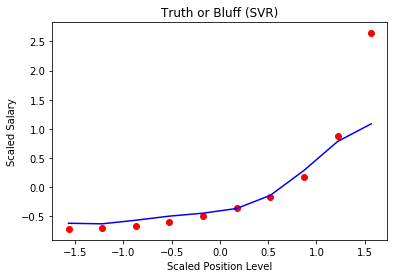

In [9]:
# visualise data
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Scaled Position Level')
plt.ylabel('Scaled Salary')
plt.show()